Задача 4.
Для заданной плотности 𝑝 наследуйтесь от класса rv_continuous и сгенерируйте с помощью реализованного подкласса для вашего распределения 𝑛 случайных чисел из данного распределения. Посмотрите, как будет работать алгоритм при росте 𝑛 (сразу большим 𝑛 не делайте).

Реализуйте генерацию для вашего распределения с помощью обратной к функции распределения (при написании функции для 𝐹−1 вызов специальных функций, например, квантили стандартного нормального закона разрешается). Проведите тот же эксперимент.

Вариант 1
$$p(x) = 3x^2 e^{-x^3} \mathbb{1}(x \geqslant 0)$$


In [ ]:
from scipy.stats import rv_continuous
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
seed = 42
np.random.seed(seed)

In [ ]:
class custom_distribution(rv_continuous):
    def _pdf(self, x):
    # Функция плотности
        return 3*x**2*np.exp(-x**3)

custom_dist = custom_distribution(a=0)

###Генерация рандомных чисел

In [ ]:
n_values = [100, 1000, 10000]

Время для n=100: 0.718411 сек
Время для n=1000: 2.701452 сек
Время для n=10000: 31.283905 сек


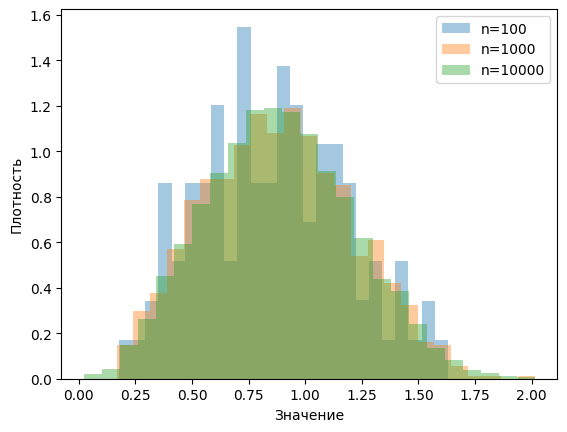

In [ ]:
for n in n_values:
    start_time = time.time()
    random_numbers = custom_dist.rvs(size=n, random_state=seed)
    end_time = time.time()

    plt.hist(random_numbers, bins=25, density=True, alpha=0.3, label=f'n={n}')
    print(f"Время для n={n}: {end_time - start_time:.6f} сек")

plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.show()

## Генерация рандомных чисел, переопределен поиск обратной функции

Для переопределения метода для возвращения функции, обратной к функции распределения (ppf), сначала найдем функцию распределения интегрированием:
$$F(x) = ∫3x^2 e^{-x^3}dx$$

$$F(x) = -e^{-x^3} + C $$

Пусть константа С = 1,
$$F(x) = -e^{-x^3} + 1 $$
$$F^- (x) = \sqrt[3]{-\ln{(1-y)}} $$

In [ ]:
class custom_distribution_v2(rv_continuous):
    def _ppf(self, q):
      # Обратная к функции распрпеделения
        return (-np.log(1-q))**(1/3)

custom_dist_v2 = custom_distribution_v2(a=0)

In [ ]:
n_values_v2 = [100, 1000, 10000, 100000]

Время для n=100, по обратной функции: 0.029024 сек
Время для n=1000, по обратной функции: 0.204679 сек
Время для n=10000, по обратной функции: 1.456583 сек
Время для n=100000, по обратной функции: 16.375365 сек


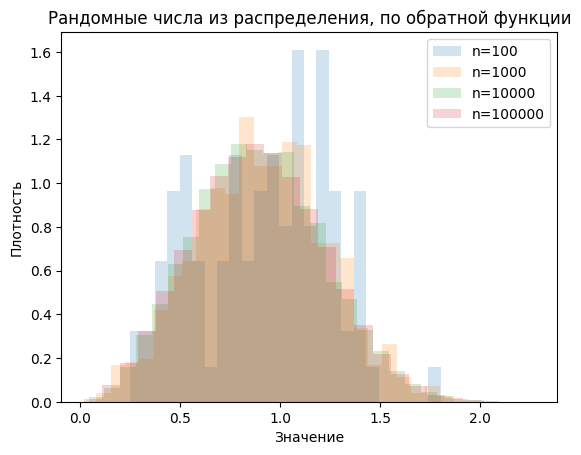

In [ ]:
for n in n_values_v2:
    start_time = time.time()
    arr = np.random.uniform(size=n, random_state=seed)
    random_numbers_inverse = [custom_dist_v2.ppf(a) for a in arr]
    end_time = time.time()
    plt.hist(random_numbers_inverse, bins=25, density=True, alpha=0.4, label=f'n={n}')
    print(f"Время для n={n}, по обратной функции: {end_time - start_time:.6f} сек")

plt.title('Рандомные числа из распределения, по обратной функции')
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.legend()

plt.show()

Генерация случайных чисел при переопределенной ppf работает быстрее (31.283905 сек vs 1.456583 сек для n = 10000);
Такой результат связан с тем, что в классе rv_continuous для генерации рандомных чисел прямым образом используется ppf, и при переопределении не происходит затрат времени на ее поиск.